In [242]:
##Data source : https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data

import pandas as pd
import matplotlib.pyplot as plt



# DataCamp Manipulating DataFrame with Pandas study Case

In [216]:
#study cas : Summer Olympic medallists 1896 to 2008.xlsx

data = pd.read_excel('./Summer Olympic medallists 1896 to 2008.xlsx', sheet_name='ALL MEDALISTS', skiprows= 4)
data.head(5)


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [66]:
# Inspecting the DataFame :

print(data.shape)
print(data.columns)
print(data.dtypes)
print(data.describe())
data.info()

(29216, 10)
Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')
City            object
Edition          int64
Sport           object
Discipline      object
Athlete         object
NOC             object
Gender          object
Event           object
Event_gender    object
Medal           object
dtype: object
            Edition
count  29216.000000
mean    1967.713171
std       32.406293
min     1896.000000
25%     1948.000000
50%     1976.000000
75%     1996.000000
max     2008.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gende

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64


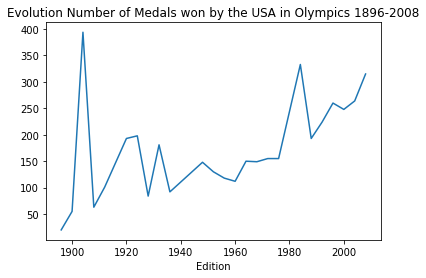

In [344]:
# the total number of USA medals awarded per edition
usa_total_medals = data.loc[data.NOC == 'USA'].groupby('Edition')['Medal'].count()
print(usa_total_medals)
usa_total_medals.plot(title='Evolution Number of Medals won by the USA in Olympics 1896-2008')
plt.show()

#we can see that in the first edition of the olympics the USA won the lowest number of medals comparing 
#to 1904 when she one largest number. 

In [68]:
data.Event_gender.value_counts()

M    20067
W     7278
X     1871
Name: Event_gender, dtype: int64

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


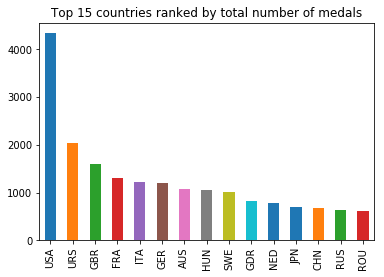

In [347]:
# Top 15 countries ranked by total number of medals won since the beginning of the olympic games
top15= data['NOC'].value_counts().head(15)
print(top15)

##to know the entire name of the country we need to merge the data table with ioc_code, on = NOC(automatically)
#then select the data['Country'].value_counts().head(15)

top15.plot(kind='bar', title='Top 15 countries ranked by total number of medals')
plt.show()


In [93]:
#Using .pivot_table() to count medals by type : the result shows a man won 

medal_by_type = data.pivot_table(index= 'NOC', columns= 'Medal', values= 'Athlete', aggfunc= 'count' )
medal_by_type['Total'] = medal_by_type.sum(axis=1)
medal_by_type.sort_values('Total', ascending= False).head(15)

Medal,Bronze,Gold,Silver,Total
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


In [99]:
# Applying .drop_duplicates() : the results shows a man wons a medal in femal Event_gender which is an error 

ev_gen = data[['Event_gender', 'Gender']]
print(ev_gen.drop_duplicates())

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [101]:
# Finding possible errors with .groupby() 

Ev = data.groupby(['Event_gender', 'Gender']).count()
Ev.head(5)

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

In [104]:
# Locating suspicious data : the row of the error 

error = data.loc[(data.Event_gender == 'W') & (data.Gender == 'Men')]
error


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


In [150]:
# Using .nunique() to rank by distinct sports

#The .nunique() method is the principal aggregation here. 
#Given a categorical Series S, S.nunique() returns the number of distinct categories.

by_country = data.groupby('NOC').nunique()
by_country.head(5)

# or data.City[data['NOC'] == 'ARG'].unique().size

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
NOC,,,,,,,,,,
AFG,1,1,1,1,1,1,1,1,1,1
AHO,1,1,1,1,1,1,1,1,1,1
ALG,5,5,3,3,13,1,2,11,2,3
ANZ,2,2,5,5,25,1,2,8,2,3
ARG,17,17,17,17,206,1,2,44,3,3


In [243]:
# Counting USA vs. USSR Cold War Olympic Sports :
# number of distinct sports in which the USA and the USSR won medals during the Cold War years.

during_cold_war = data.loc[(data.Edition>= 1952) & (data.Edition <= 1988)] # retuns dataFrame

usa_usa_cold_war = during_cold_war.loc[(data['NOC']== 'USA') | (data['NOC'] == 'URS')]
# or during_cold_war[during_cold_war['NOC'].isin(['USA','URS']) 

# in one line : data.loc[(data.Edition>= 1952) & (data.Edition <= 1988)].loc[(data['NOC']== 'USA') | (data['NOC'] == 'URS')]

groupby_NOC = usa_usa_cold_war.groupby('NOC')['Sport'].nunique().sort_values()
groupby_NOC


# other solution : 
# during_cold_war = (data.Edition>= 1952) & (data.Edition <= 1988) # returns bool
# is_usa_urs = data.NOC.isin(['USA', 'URS']) # returns bool
# cold_war_medals = data.loc[during_cold_war & is_usa_urs] # retuns dataFrame
# country_grouped = cold_war_medals.groupby('NOC')[Sport].nunique().sort_values(ascending=False)

NOC
USA    20
URS    21
Name: Sport, dtype: int64

In [225]:
# Counting USA vs. USSR Cold War Olympic Medals
#which country, the USA or the USSR, won the most medals consistently over the Cold War period.

medals_won_by_country = data.pivot_table(index= 'Edition', columns='NOC', values='Athlete', aggfunc= 'count') #values could be any column

cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']] # slicing the index and columns

most_medals = cold_war_usa_urs_medals.idxmax(axis='columns') # idxmax() returns the row/column of the max value

most_medals.value_counts() # 


URS    8
USA    2
dtype: int64

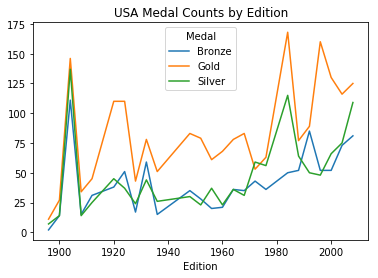

In [291]:
# Visualizing USA Medal Counts by Edition: Line Plot

usa = data[data.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year= usa_medals_by_year.unstack(level='Medal') # this gives us 3 variables to plot
usa_medals_by_year.plot(title='USA Medal Counts by Edition')
plt.show()

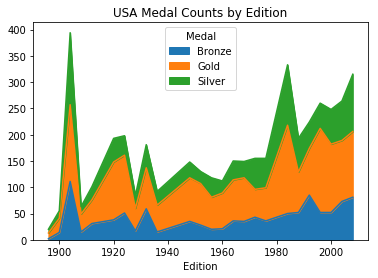

In [295]:
# Visualizing USA Medal Counts by Edition: Area Plot
usa = data[data.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year= usa_medals_by_year.unstack(level='Medal') # this gives us 3 variables to plot
usa_medals_by_year.plot(kind= 'area',title='USA Medal Counts by Edition')
plt.show()

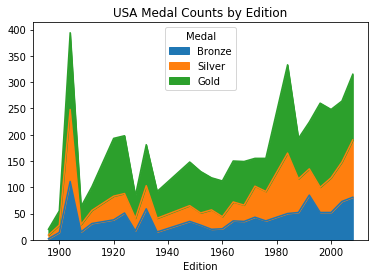

In [300]:
# Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

# Redefine 'Medal' as an ordered categorical

data.Medal = pd.Categorical(values = data.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True )
usa = data[data.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year= usa_medals_by_year.unstack(level='Medal') # this gives us 3 variables to plot
usa_medals_by_year.plot.area(title='USA Medal Counts by Edition')
plt.show()

In [262]:
# The ranking of sport in which the USA won most gold medal 
usa = data[(data.NOC == 'USA') & (data.Medal == 'Gold')]
usa.Sport.value_counts()

Athletics          472
Swimming           459
Basketball         234
Rowing             168
Shooting           113
Football            73
Sailing             60
Boxing              48
Diving              48
Wrestling Free.     47
Rugby               46
Artistic G.         46
Softball            45
Volleyball          36
Tennis              27
Baseball            24
Archery             22
Eventing            16
Synchronized S.     16
Weightlifting       16
Jumping             14
Golf                12
Cycling Track       10
Beach volley.       10
Canoe / Kayak F      6
Tug of War           5
Cycling Road         4
Wrestling Gre-R      3
Taekwondo            2
Canoe / Kayak S      2
Fencing              2
Roque                1
Jeu de Paume         1
Name: Discipline, dtype: int64

# DataCamp Merging DataFrame with Pandas study Case 
## Does a county wins more Olympis Medals when it's the host country ? 

###### To answer this question we will use files:

**_Edition(BREAKDOWN) sheet_**: list of all olympics games edition, with the hostiong country and total medals(Grand Total) awarded_.

**_Country code sheet_**: list of country codes used by the olympic's international committe to identify each country_.

**_Collection of 26 summer files_** (file for each game edition that details the type of medal won by each athlete in individual sports, their county_.


In [316]:
##Loading Olympic edition DataFrame: 

file_path = './Summer Olympic medallists 1896 to 2008.xlsx'
editions = pd.read_excel(file_path, sheet_name= 'BREAKDOWN', skiprows= 2, nrows=26, usecols=6)
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]
editions

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


In [318]:
##Loading IOC codes DataFrame

file_path = './Summer Olympic medallists 1896 to 2008.xlsx'
ioc_codes = pd.read_excel(file_path, sheet_name='IOC COUNTRY CODES')
ioc_codes = ioc_codes[['Country','Int Olympic Committee code' ]]
ioc_codes.columns = ['Country', 'NOC']
ioc_codes

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND
5,Angola,ANG
6,Antigua and Barbuda,ANT
7,Argentina,ARG
8,Armenia,ARM
9,Aruba*,ARU


In [329]:
#Building medals DataFrame 
# Using year in column esitions['Edition'] to open up each summer file and then conatenate them in one dt

#medals_dict = {}
#for year in editions['Edition']:
#    # Create the file path: file_path
#    file_path = 'summer_{:d}.csv'.format(year) 
#    # Load file_path into a DataFrame: medals_dict[year]
#     medals_dict[year] = pd.read_csv(file_path)
#    # Extract relevant columns: medals_dict[year]
#    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
#     # Assign year to column 'Edition' of medals_dict(creating new column with year as an entry)
#    medals_dict[year]['Edition'] = year   

# Concatenate medals_dict: medals
#medals = pd.concat(medals_dict, ignore_index=True)



# but since the xlsx file we have contains this dataFrame already ready : 

medals = pd.read_excel('./Summer Olympic medallists 1896 to 2008.xlsx', sheet_name='ALL MEDALISTS', skiprows=4)
medals= medals[['Athlete', 'NOC', 'Medal', 'Edition']]
medals


,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896
5,"CHOROPHAS, Efstathios",GRE,Bronze,1896
6,"HAJOS, Alfred",HUN,Gold,1896
7,"ANDREOU, Joannis",GRE,Silver,1896
8,"CHOROPHAS, Efstathios",GRE,Bronze,1896
9,"NEUMANN, Paul",AUT,Gold,1896


In [331]:
# How well each country performed? Counting medals by country/edition in a pivot table

#pivot_table to know how many medals won each country in each edition

medal_counts = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')
medal_counts

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaN,NaN,NaN,NaN,11.0,NaN,10.0,4.0,NaN,NaN,...,NaN,22.0,198.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1928,NaN,NaN,NaN,NaN,32.0,NaN,4.0,4.0,NaN,NaN,...,NaN,22.0,84.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,4.0,NaN,5.0,5.0,NaN,NaN,...,NaN,1.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
#Computing fraction of medals per edition to normalise the data

totals = editions.set_index('Edition') 
totals = totals['Grand Total']

# Divide medal_counts by totals medals awarded in each edition
fractions = medal_counts.divide(totals,axis='rows')
fractions

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,NaN,0.004622,NaN,NaN,NaN,...,NaN,NaN,0.148690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaN,NaN,NaN,NaN,0.012443,NaN,0.011312,0.004525,NaN,NaN,...,NaN,0.024887,0.223982,NaN,NaN,NaN,0.002262,NaN,NaN,NaN
1928,NaN,NaN,NaN,NaN,0.045070,NaN,0.005634,0.005634,NaN,NaN,...,NaN,0.030986,0.118310,NaN,NaN,NaN,0.016901,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,0.006504,NaN,0.008130,0.008130,NaN,NaN,...,NaN,0.001626,0.294309,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
#Computing percentage change in fraction of medals won : To see if there is a host country advantage, 
#you first want to see how the fraction of medals won changes from edition to edition.

#The expanding mean provides a way to see this down each column. 
#It is the value of the mean with all the data available up to that point in time. 

# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change
#This returns the % changes of each country's fraction of medal won
fractions_change = fractions_change.reset_index()
fractions_change

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,1920,NaN,NaN,NaN,0.000000,NaN,NaN,-19.941000,0.000000,NaN,...,NaN,NaN,-6.915097,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,1924,NaN,NaN,NaN,0.000000,NaN,NaN,5.702839,-10.776910,NaN,...,NaN,NaN,-0.759421,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,1928,NaN,NaN,NaN,0.000000,131.101152,NaN,-8.427271,-7.240938,NaN,...,NaN,12.253521,-6.200507,NaN,NaN,NaN,323.521127,NaN,NaN,0.000000
8,1932,NaN,NaN,NaN,0.000000,-25.794206,NaN,-1.468835,-2.910142,NaN,...,NaN,-31.393193,3.739184,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
9,1936,NaN,NaN,NaN,0.000000,-10.271982,NaN,-12.427233,50.598506,NaN,...,NaN,0.000000,-5.397317,NaN,NaN,NaN,-29.357594,NaN,NaN,0.000000


In [334]:
# Reshaping and ploting: 


#Quantifying the influence of being the host country :
#(notion of host advantage :when the country hosts the olympic games does it win more medals?): 
#that's when the plot shows large positive change systematically

#To see and interpretate the trends we need to reshape the table and add the host country.
#plot the variabbe pct_change 

hosts = pd.merge(editions, ioc_codes, how='left') # Left join editions and ioc_codes.
hosts = hosts[['Edition', 'NOC']].set_index('Edition')# Extract relevant columns and set index(To find where the NOC is null and fill with correspondant country) .

# Fix missing 'NOC' values of hosts

print(hosts.loc[hosts.NOC.isnull()])

hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts= hosts.reset_index()
hosts



         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
5,1920,BEL
6,1924,FRA
7,1928,NED
8,1932,USA
9,1936,GER


In [335]:
# Reshaping for analysis

#fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns 
#(one for the edition and 138 for the competing countries).

#On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns 
#that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

# Reshape fractions_change: 
reshaped = pd.melt(fractions_change, id_vars= 'Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped['NOC']=='CHN']
chn

#On looking at the hosting countries from 
#the last 5 Olympic editions and the fractional change of medals won by China the last 5 editions, 
#you can see that China fared significantly better in 2008 (i.e., when China was the host country).

(3588, 3) (26, 139)


,Edition,NOC,Change
546,1896,CHN,NaN
547,1900,CHN,NaN
548,1904,CHN,NaN
549,1908,CHN,NaN
550,1912,CHN,NaN
551,1920,CHN,NaN
552,1924,CHN,NaN
553,1928,CHN,NaN
554,1932,CHN,NaN
555,1936,CHN,NaN


In [336]:
#Merging to compute influence

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()
influence

#The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals 
#won for the host country in each Olympic edition.

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332


,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226
1920,BEL,54.757887
1924,FRA,2.046362
1928,NED,36.315243
1932,USA,3.739184


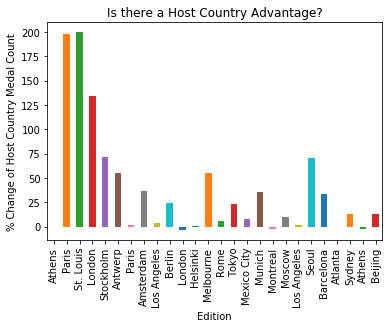

In [339]:
#Plotting influence of host country

# Extract influence['Change']:
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City']) # organising country

plt.show()


#the plot shows large positive change systematically in the 
#percentage fractions of medals won by the countries when hosting the Olympic games.
#Thus there is an advantage of the hosting country for some countries(Greece, France,...)